In [1]:
%matplotlib inline

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, make_circles
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC, NuSVC, OneClassSVM

# Support Vector Machines 

## Demos

In [3]:
attributes, labels = load_iris().data, load_iris().target

In [4]:
attributes_train,attributes_test, labels_train, labels_test = train_test_split(attributes, labels, test_size = 0.15, stratify=labels)

In [5]:
tree = DecisionTreeClassifier(min_samples_leaf = 5)

In [6]:
tree.fit(attributes_train, labels_train)

DecisionTreeClassifier(min_samples_leaf=5)

In [7]:
tree.score(attributes_train, labels_train)

0.9763779527559056

In [8]:
tree.score(attributes_test, labels_test)

0.8695652173913043

In [9]:
tree.feature_importances_

array([0.        , 0.        , 0.02107465, 0.97892535])

In [10]:
print(load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
permutation_importance(tree, attributes_train, labels_train)

{'importances_mean': array([0.        , 0.        , 0.        , 0.63622047]),
 'importances_std': array([0.        , 0.        , 0.        , 0.02193447]),
 'importances': array([[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.65354331, 0.64566929, 0.61417323, 0.60629921, 0.66141732]])}

In [12]:
permutation_importance(tree, attributes_train, labels_train)['importances_mean']

array([0.       , 0.       , 0.       , 0.6519685])

In [13]:
# Creating new model without first two features -a.k.a. features selection
tree_new = DecisionTreeClassifier(min_samples_leaf = 5)

In [14]:
tree_new.fit(attributes_train[:, 2:], labels_train)

DecisionTreeClassifier(min_samples_leaf=5)

In [15]:
# tree_new.score(attributes_train[:, 2:], labels_train)

In [16]:
tree_new.feature_importances_

array([0.02107465, 0.97892535])

In [17]:
permutation_importance(tree_new, attributes_train[:, 2:], labels_train,n_repeats=50)['importances_mean']

array([0.        , 0.64787402])

In [18]:
linear_svm = SVC(C = 100, kernel='linear')

In [19]:
linear_svm.fit(attributes_train, labels_train)

SVC(C=100, kernel='linear')

In [20]:
linear_svm.coef_, linear_svm.intercept_

(array([[ -0.16986536,   0.47475009,  -0.93090756,  -0.51261047],
        [  0.02436512,   0.21875659,  -0.52808813,  -0.25901212],
        [  1.18531308,   2.80460841,  -4.42449055, -10.54803585]]),
 array([ 2.03616588,  1.15110235, 24.02246187]))

In [21]:
linear_svm.support_vectors_

array([[4.5, 2.3, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5.1, 2.5, 3. , 1.1],
       [6.3, 2.5, 4.9, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [6. , 2.7, 5.1, 1.6],
       [6.1, 2.6, 5.6, 1.4],
       [4.9, 2.5, 4.5, 1.7],
       [6. , 3. , 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.2, 2.8, 4.8, 1.8]])

In [22]:
linear_svm.score(attributes_train, labels_train)

0.984251968503937

In [23]:
linear_svm.score(attributes_test, labels_test)

0.9565217391304348

In [28]:
X, y = make_circles(n_samples=100, factor=0.5, noise=0.07)

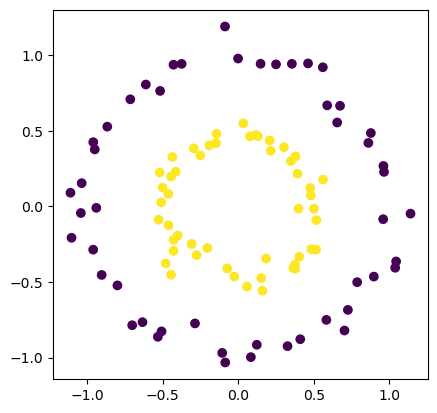

In [29]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.gca().set_aspect('equal')
plt.show()

In [34]:
circles_linear_svm = SVC(C = 10000, kernel = 'linear')

In [35]:
circles_linear_svm.fit(X,y)

SVC(C=10000, kernel='linear')

In [36]:
circles_linear_svm.score(X, y)

0.57

In [38]:
circles_poly_svm = SVC(C = 10000, kernel = 'poly')

In [39]:
circles_poly_svm.fit(X, y)

SVC(C=10000, kernel='poly')

In [40]:
circles_poly_svm.score(X, y)

0.66

In [44]:
circles_gaussian_svm = SVC(C = 10000, kernel = 'rbf', gamma = 0.7)

In [45]:
circles_gaussian_svm.fit(X, y)

SVC(C=10000, gamma=0.7)

In [46]:
circles_gaussian_svm.score(X, y)

1.0

In [54]:
anomaly_detector = OneClassSVM(nu = 0.05, gamma = 0.2)

In [55]:
anomaly_detector.fit(attributes_train)

OneClassSVM(gamma=0.2, nu=0.05)

In [56]:
anomaly_detector.predict(attributes_train)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [58]:
anomaly_detector

OneClassSVM(gamma=0.2, nu=0.05)